The delta variant, dominant since the summer months 2021.
July 2021 - November 2021

https://www.usnews.com/news/health-news/articles/2021-12-28/cdc-omicron-overtook-delta-as-dominant-variant#:~:text=The%20delta%20variant%2C%20which%20has,while%20omicron%20rose%20to%2058.6%25.

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [2]:
# !pip install PyTorch
import torch

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

No GPU available, using the CPU instead.


In [ ]:
import torch
if torch.cuda.is_available():    
    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")
# If not...
else:
    device = torch.device("cpu")

In [3]:
Delta_2021JulAugSep_rawPostData = pd.read_csv('./Rcode/Reddit_post_202107_202109.csv')
Delta_2021JulAugSep_rawCommentData = pd.read_csv('./Rcode/Reddit_comment_202107_202109.csv') 
Delta_2021JulAugSep_rawData = pd.concat([Delta_2021JulAugSep_rawPostData, Delta_2021JulAugSep_rawCommentData],axis=0)
Delta_2021JulAugSep_rawData = Delta_2021JulAugSep_rawData.sort_values(by=['author', 'created_utc']) #sort by time
Delta_2021JulAugSep_rawData = Delta_2021JulAugSep_rawData.reset_index(drop=True)
Delta_2021JulAugSep_rawData

,author,created_utc,num_comments,permalink,body,title,link_flair_text,file_code
0,----banana----,2021-07-10 22:55:53,5,/r/COVID19positive/comments/ohssu5/when_should...,"hi, i tested positive for covid19 last thursda...",when should my smell and taste return back to ...,Question-to those who tested positive,30
1,----banana----,2021-07-11 17:36:50,0,/r/COVID19positive/comments/ohssu5/when_should...,thank you! really hoping it’s similar ish for ...,comment,comment,508
2,---time--,2021-07-13 18:45:58,0,/r/COVID19positive/comments/oj0jxx/5_vaccinate...,Take your family and just hang out at Costco. ...,comment,comment,606
3,--GA--,2021-07-12 09:17:12,0,/r/COVID19positive/comments/oinfhs/help_with_v...,"try to visit the r/covidlonghaulers subreddit,...",comment,comment,539
4,--GA--,2021-08-01 09:57:00,0,/r/COVID19positive/comments/ouqk6y/will_i_have...,What are your antibody levels at 7months out? ...,comment,comment,1500
...,...,...,...,...,...,...,...,...
119650,zz_tops_beards,2021-08-31 02:25:53,0,/r/COVID19positive/comments/peh4jt/recovering_...,I’ll take that as a “No”.,comment,comment,2925
119651,zz_tops_beards,2021-08-31 02:49:11,0,/r/COVID19positive/comments/peh4jt/recovering_...,What’s there to chat about. It’s a yes or no q...,comment,comment,2926
119652,zz_tops_beards,2021-08-31 03:01:16,0,/r/COVID19positive/comments/peh4jt/recovering_...,"Needle shy, probably.",comment,comment,2927
119653,zzamanta,2021-07-05 18:24:25,0,/r/COVID19positive/comments/odzitr/one_week_do...,Loss of smell and taste is always the last sym...,comment,comment,221


### Combine title and body

In [4]:
import re
author = Delta_2021JulAugSep_rawData[['author']].author.values
body_sentences = Delta_2021JulAugSep_rawData[['body']].body.values
title = Delta_2021JulAugSep_rawData[['title']].title.values
created_utc = Delta_2021JulAugSep_rawData[['created_utc']].created_utc.values
title_body_sentences, author_cleaned, body_sentences_cleaned, title_cleaned, created_utc_cleaned= [], [], [], [], []
for i in range(len(body_sentences)):
    if type(body_sentences[i]) != str:
        body_sentences[i] = str(body_sentences[i])
    if len(body_sentences[i].split()) <= 3:  #remove body with less than one word
        continue
    body_sentences[i] = body_sentences[i].replace('_x000D_',' ').replace('\r', '').replace('\n', '').replace('  ','').replace('[removed]','').replace("\'","'").replace('&amp;','&')
    body_sentences[i] = re.sub(r'http\S+', '', body_sentences[i]) #remove website http:
    body_sentences[i] = re.sub(r'\<U\+[A-Za-z0-9]+\>','', body_sentences[i]) #remove emoji
    body_sentences_cleaned.append(body_sentences[i])
    title_cleaned.append(title[i])
    title_body_sentences.append(title[i] + ": " + body_sentences[i])
    author_cleaned.append(author[i])
    created_utc_cleaned.append(created_utc[i])

cleaned_temp_data = pd.DataFrame() #record for later using to create positive dataframe
cleaned_temp_data['author'] = author_cleaned
cleaned_temp_data['body'] = body_sentences_cleaned
cleaned_temp_data['title'] = title_cleaned
cleaned_temp_data['created_utc'] = created_utc_cleaned


temp_data = pd.DataFrame()
temp_data['author'] = author_cleaned 
temp_data['title_body_sentences'] = title_body_sentences 
temp_data['title_body'] = temp_data.groupby(['author'])['title_body_sentences'].transform(lambda x: '. '.join(x))

final_data = temp_data[['author','title_body']]
final_data = final_data.drop_duplicates()
final_data = final_data.reset_index(drop=True)
final_data 

,author,title_body
0,----banana----,when should my smell and taste return back to ...
1,---time--,comment: Take your family and just hang out at...
2,--GA--,comment: try to visit the r/covidlonghaulers s...
3,--ozzy--,comment: I had chipotle for dinner and the onl...
4,-0blivious-,comment: This. Did he even apologise at all? I...
...,...,...
17707,zxykzxyk,When to contact GP: I tested positive for covi...
17708,zyadox_,I felt the symptoms of covid 5 days ago: Hello...
17709,zz_tops_beards,comment: should delete this bizarre troll acc...
17710,zzamanta,comment: Loss of smell and taste is always the...


In [106]:
all_words_len= [] #record length
# For every sentence...
for sent in final_data['title_body']:
    all_words_len.append(len(sent.split()))
print('Max sentence length (for words): ', max(all_words_len))   
print('Min sentence length (for words): ', min(all_words_len))  
print('0.25, 0.5, 0.75, and 0.95 Quantile sentence length (for words):', np.quantile(all_words_len,[0.25, 0.5, 0.75, 0.95]) ) 


Max sentence length (for words):  609955
Min sentence length (for words):  4
0.25, 0.5, 0.75, and 0.95 Quantile sentence length (for words): [  43.  108.  260. 1044.]


### Prepare test data

In [5]:
MAX_LEN = 512

In [112]:
import numpy as np
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased', do_lower_case = True)
input_ids = []    # chunks embedding ID 
author_names = final_data['author'].to_numpy()  # Get the author names from the dataset.

chunk_author = [] # Record author names for chunks 
chunk_nums = []   # Record number of chunks for each author

print('Tokenizing comments...')
# For every sentence...
for i, sen in enumerate(final_data['title_body']):
    if ((len(input_ids) % 1000) == 0):
        print('Read {:,} comments.'.format(len(input_ids)))

    encoded_sent = tokenizer.encode(
                        sen,                      # Sentence to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        #max_length = 512,          # Truncate all sentences.                        
                        #return_tensors = 'pt',     # Return pytorch tensors.
                   ) 
    author_i = author_names[i]

    if len(encoded_sent) > MAX_LEN:   #For long document, chunk it
        encoded_sent = encoded_sent[1:-1]   # Strip off special tokens.
        chunk_len = MAX_LEN - 2             # each chunk needs its own CLS and SEP tokens.
        chunk_nums.append(len(range(0, len(encoded_sent), chunk_len))) ### add number of chunks for each author
        # For each starting index...
        for j in range(0, len(encoded_sent), chunk_len):
            tokens = encoded_sent[j:j+chunk_len]
            chunk = [tokenizer.cls_token_id] + tokens + [tokenizer.sep_token_id]   # Add the special tokens.
            input_ids.append(chunk)
            chunk_author.append(author_i)   # Give all the chunks the same author names. 
    
    else:    #For short document, add it to the list.
        chunk_nums.append(1) ### add number of chunks for each author
        input_ids.append(encoded_sent)
        chunk_author.append(author_i)   

print('DONE.')
print('{:>10,} documents before chunking'.format(len(final_data)))
print('{:>10,} comments after chunking'.format(len(input_ids)))
print('{:>10,} length of each chunk'.format(MAX_LEN))


Token indices sequence length is longer than the specified maximum sequence length for this model (1562 > 512). Running this sequence through the model will result in indexing errors


Tokenizing comments...
Read 0 comments.
Read 1,000 comments.
Read 5,000 comments.
Read 6,000 comments.
Read 7,000 comments.
Read 8,000 comments.
Read 10,000 comments.
Read 14,000 comments.
Read 15,000 comments.
Read 17,000 comments.
Read 18,000 comments.
Read 19,000 comments.
Read 21,000 comments.
Read 23,000 comments.
Read 25,000 comments.
Read 27,000 comments.
DONE.
    17,712 documents before chunking
    27,812 comments after chunking
       512 length of each chunk


### Pad chunks and Add Attention Masks

In [113]:
# Some of the samples need to be padded out to 128 tokens 
from keras.preprocessing.sequence import pad_sequences
print('Padding/truncating all chunks to %d values...' % MAX_LEN)
print('Padding token: "{:}", ID: {:}'.format(tokenizer.pad_token, tokenizer.pad_token_id))
# Pad input tokens with value 0.
input_ids = pad_sequences(input_ids, maxlen=MAX_LEN, dtype="long", 
                          value=0, truncating="post", padding="post")
print('{:>10,} chunks in total'.format(len(input_ids)))


# Create attention masks for each chunk
attention_masks = []
for chu in input_ids:
    att_mask = [int(token_id > 0) for token_id in chu]
    attention_masks.append(att_mask)
print('{:>10,} attention masks in total'.format(len(attention_masks)))
print('{:>10,} length for each attention mask'.format(len(attention_masks[0])))

Using TensorFlow backend.


Padding/truncating all chunks to 512 values...
Padding token: "[PAD]", ID: 0
    27,812 chunks in total
    27,812 attention masks in total
       512 length for each attention mask


### Obtain test input

In [114]:
test_authors_set = set(final_data['author'])
test_inputs, test_labels, test_masks, test_chunk_author  = [], [], [], []
for i in range(len(input_ids)):
    test_inputs.append(input_ids[i])
    test_masks.append(attention_masks[i])  
    test_chunk_author.append(chunk_author[i])
test_inputs = np.array(test_inputs)
print('test data has %d authors, %d chunks'%(len(test_authors_set), len(test_inputs)))

test data has 17712 authors, 27812 chunks


### Dictionary mapping authors to chunk index

In [115]:
test_author_ind_dic ={}
for i in range(len(test_chunk_author)):
    Author = test_chunk_author[i]
    if Author not in test_author_ind_dic: 
      test_author_ind_dic[Author] = [i]
    else:
      test_author_ind_dic[Author].append(i)
print('test dictionary has %d authors'%(len(test_author_ind_dic)))

test dictionary has 17712 authors


### Convert all inputs into torch tensors

In [116]:
import torch
test_inputs = torch.tensor(test_inputs)
test_masks = torch.tensor(test_masks)

### Create an iterator for the dataset using the torch DataLoader class. (help save on memory during training)

In [117]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
batch_size = 32
# Create the DataLoader for test set.
test_data = TensorDataset(test_inputs, test_masks)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [118]:
import time
import datetime
def format_time(elapsed):
    elapsed_rounded = int(round((elapsed)))
    return str(datetime.timedelta(seconds=elapsed_rounded))

### Prediction on test dataset on GWU HPC

In [ ]:
# Prediction on test dataset
<prevent running>
from transformers import BertForSequenceClassification, AdamW, BertConfig
output_dir = './output_files/BERTlarge_CLS2_model_chunk512_epoch2' + '/' 
model_chuncking = BertForSequenceClassification.from_pretrained(output_dir)
tokenizer = tokenizer.from_pretrained(output_dir)
model_chuncking.to(device)  # Copy the model to the GPU.

print('Predicting labels for {:,} test chunks...'.format(len(test_inputs)))
model_chuncking.eval()
predictions  = []

t0 = time.time()
for (step, batch) in enumerate(test_dataloader):

  # Add batch to GPU
  batch = tuple(t.to(device) for t in batch)

  # Progress update every 100 batches.
  if step % 100 == 0 and not step == 0:
      elapsed = format_time(time.time() - t0)
      print('  Batch {:>5,}  of  {:>5,}.    Elapsed: {:}.'.format(step, len(test_dataloader), elapsed))

  # Unpack the inputs from dataloader
  b_input_ids, b_input_mask = batch
  with torch.no_grad():
      # Forward pass, calculate logit predictions
      outputs = model_chuncking(b_input_ids, token_type_ids=None, 
                      attention_mask=b_input_mask)

  logits = outputs[0]
  logits = logits.detach().cpu().numpy()
  predictions.append(logits)

print('------DONE.------')
predictions = np.concatenate(predictions, axis=0)

#save the predictions:
#np.savetxt('./output_files/BERTlarge_CLS2_model_chunk512/Delta_variant_2021JulAugSep/Delta_variant_2021JulAugSep.txt', predictions)


### Read the prediction values and normalize them

In [119]:
#read 
Delta_variant_2021JulAugSep_classPred = np.loadtxt('./output_files/BERTlarge_CLS2_model_chunk512/Delta_variant_2021JulAugSep/Delta_variant_2021JulAugSep.txt', dtype=float)
Delta_variant_2021JulAugSep_classPred = torch.tensor(Delta_variant_2021JulAugSep_classPred)
Delta_variant_2021JulAugSep_classPred = (Delta_variant_2021JulAugSep_classPred-Delta_variant_2021JulAugSep_classPred.min(0, keepdim=True).values)/(Delta_variant_2021JulAugSep_classPred.max(0, keepdim=True).values - Delta_variant_2021JulAugSep_classPred.min(0, keepdim=True).values)
Delta_variant_2021JulAugSep_classPred.shape


torch.Size([27812, 2])

### Read the trained weights

In [120]:
trained_W0 = torch.tensor(np.loadtxt('./output_files/BERTlarge_CLS2_model_chunk512/trained_W0.txt'),dtype=torch.float32)
trained_W1 = torch.tensor(np.loadtxt('./output_files/BERTlarge_CLS2_model_chunk512/trained_W1.txt'),dtype=torch.float32)

### original chunk scores and zero-pad chunk scores

In [121]:
max_chunk_nums = 100  #max chunk number, if larger than this, truncate it. 
test_chunks_scores = []
for Author in final_data['author']:
    chunk_indeces = test_author_ind_dic[Author]
    if len(chunk_indeces) <= max_chunk_nums:
      chunks_outputs = Delta_variant_2021JulAugSep_classPred[chunk_indeces, :]
    if len(chunk_indeces) > max_chunk_nums:
      chunks_outputs = Delta_variant_2021JulAugSep_classPred[chunk_indeces[0:max_chunk_nums], :]
    test_chunks_scores.append(chunks_outputs)

### zero-pad chunk scores
test_chunks_pad_scores = []
for i in range(len(test_chunks_scores)):
    zero_pad = np.zeros( (max_chunk_nums -len(test_chunks_scores[i]), 2))
    pad_score = np.vstack((test_chunks_scores[i], zero_pad))
    test_chunks_pad_scores.append(pad_score)
test_chunks_pad_scores = torch.tensor(np.array(test_chunks_pad_scores),dtype=torch.float)  #(544,495,4)
print('test_chunks_pad_scores:',test_chunks_pad_scores.shape)

test_chunks_pad_scores: torch.Size([17712, 100, 2])


### time weight and weighted scores

In [122]:
test_h0 = trained_W0.t().matmul(test_chunks_pad_scores)
weighted_test_scores = trained_W1.t().matmul(test_h0).reshape(2,-1)
weighted_test_scores = weighted_test_scores.detach().numpy() # convert torch.tensor to array
weighted_test_scores.shape

(2, 17712)

### final prediction

there are 8794 authors are predicted positive.


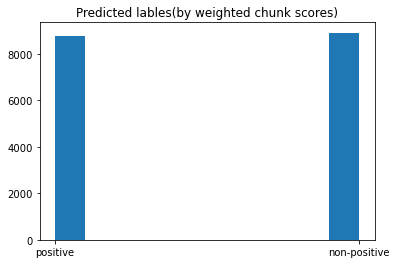

In [123]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
weighted_labels = np.argmax(weighted_test_scores, axis=0)
weighted_labels_text = [['non-positive','positive'][weighted_labels[i] ] for i in range(len(weighted_labels))]
plt.hist(weighted_labels_text)
plt.title('Predicted lables(by weighted chunk scores)')
print('there are %d authors are predicted positive.'  %sum(weighted_labels))

### Get positive data 2021JulAugSep

In [126]:
import re
final_data['pred_class'] = weighted_labels #add predicted label to final_data
positive_data2021JulAugSep = final_data[['author','pred_class']].merge(cleaned_temp_data, 
                                                        left_on='author', right_on='author',how='left')
positive_data2021JulAugSep = positive_data2021JulAugSep[positive_data2021JulAugSep['pred_class']==1]
#positive_data2021JulAugSep.to_csv('./output_files/2021JulAugSep/positive_data2021JulAugSep.csv',index=False, encoding='utf_8_sig')

### Read positive data 2021 Jul Aug Sep

In [31]:
positive_data2021JulAugSep = pd.read_csv('./output_files/2021JulAugSep/positive_data2021JulAugSep.csv')
print("%d positive authors"%len(set(positive_data2021JulAugSep.author)))
positive_data2021JulAugSep

8794 positive authors


,author,pred_class,body,title,created_utc
0,----banana----,1,"hi, i tested positive for covid19 last thursda...",when should my smell and taste return back to ...,2021-07-10 22:55:53
1,----banana----,1,thank you! really hoping it’s similar ish for ...,comment,2021-07-11 17:36:50
2,--ozzy--,1,I had chipotle for dinner and the only thing I...,comment,2021-08-02 04:56:18
3,-1911-,1,I tested positive for covid and had a fever fo...,comment,2021-09-13 17:48:42
4,-BellaDomina-,1,Not vaccinated??? Let's hope all the family li...,comment,2021-07-23 03:06:33
...,...,...,...,...,...
56164,zyadox_,1,"I tested positive 21 days ago , my sense of sm...",Hello I have a question for smokers/ vapers wh...,2021-09-02 12:19:07
56165,zyadox_,1,"I tested positive for covid 19 50 days ago , l...",I'm wondering if any of you guys have an effic...,2021-09-22 15:22:05
56166,zyadox_,1,"I tested positive for covid 19 50 days ago , l...",I'm wondering if any of you guys have an effic...,2021-09-22 15:23:26
56167,zyadox_,1,thank you for your time and response,comment,2021-09-22 17:51:09


## NLP extraction 

In [128]:
from datasets import load_dataset, load_metric
from transformers import AutoModelForQuestionAnswering, TrainingArguments, Trainer
from transformers import BertForQuestionAnswering,BertTokenizer,BertModel,AutoTokenizer # AdamW, BertConfig
bert_large_finetuned_model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
biobert_large_finetuned_model = BertForQuestionAnswering.from_pretrained('dmis-lab/biobert-large-cased-v1.1-squad')
tokenizer_large = AutoTokenizer.from_pretrained('bert-large-uncased')
tokenizer_biobert_large = AutoTokenizer.from_pretrained('dmis-lab/biobert-large-cased-v1.1-squad')
positive_len_bert, positive_len_biobert = [],[] #record length

args_large = TrainingArguments(
    f"test-squad",
    evaluation_strategy = "epoch",
    learning_rate= 3e-5,  
    per_device_train_batch_size = 16,  
    per_device_eval_batch_size= 16,   
    num_train_epochs= 2, 
    weight_decay=0.01)
trainer_large_BERT = Trainer(
    bert_large_finetuned_model,
    args_large,
    #train_dataset=tokenized_datasets["train"],
    #eval_dataset=tokenized_datasets["validation"],
    #data_collator=data_collator,
    tokenizer=tokenizer_large)
trainer_large_BioBERT = Trainer(
    biobert_large_finetuned_model,
    args_large,
    #train_dataset=tokenized_datasets["train"],
    #eval_dataset=tokenized_datasets["validation"],
    #data_collator=data_collator,
    tokenizer=tokenizer_biobert_large)

### Create positive QA dataset (2021 Jul Aug Sep)

In [129]:
#Create QA Positive dataset
from datasets import Dataset

positive_data_dic = {'id':[], 'title':[], "context":[], "answers":[], "question":[] }
for k in range(len(positive_data2021JulAugSep)):
    positive_data_dic['id'].append(str(positive_data2021JulAugSep.index[k])) # 
    positive_data_dic['title'] += [positive_data2021JulAugSep['author'].iloc[k] + positive_data2021JulAugSep['title'].iloc[k]] 
    positive_data_dic['context'] += [positive_data2021JulAugSep['body'].iloc[k]]     #body 
    positive_data_dic['answers'] += ['']                          #leave the answers blank 
    positive_data_dic['question'] += ['What are my uncomfortable symptoms?']
PositiveData_QUAD2021JulAugSep = Dataset.from_dict(positive_data_dic)
print(PositiveData_QUAD2021JulAugSep)


Dataset({
    features: ['id', 'title', 'context', 'answers', 'question'],
    num_rows: 56169
})


In [ ]:
def prepare_validation_features(examples, tokenizer = tokenizer_large):
    max_length = 300 # The maximum length of a feature (question and context)
    doc_stride = 128 # The authorized overlap between two part of the context when splitting it is needed.
    pad_on_right = tokenizer.padding_side == "right"
    
    # Tokenize our examples with truncation and maybe padding, but keep the overflows using a stride. This results
    # in one example possible giving several features when a context is long, each of those features having a
    # context that overlaps a bit the context of the previous feature.
    tokenized_examples = tokenizer(
        examples["question" if pad_on_right else "context"],
        examples["context" if pad_on_right else "question"],
        truncation="only_second" if pad_on_right else "only_first",
        max_length=max_length,
        stride=doc_stride,
        return_overflowing_tokens=True,
        return_offsets_mapping=True,
        padding="max_length",
    )

    # Since one example might give us several features if it has a long context, we need a map from a feature to
    # its corresponding example. This key gives us just that.
    sample_mapping = tokenized_examples.pop("overflow_to_sample_mapping")

    # We keep the example_id that gave us this feature and we will store the offset mappings.
    tokenized_examples["example_id"] = []

    for i in range(len(tokenized_examples["input_ids"])):
        # Grab the sequence corresponding to that example (to know what is the context and what is the question).
        sequence_ids = tokenized_examples.sequence_ids(i)
        context_index = 1 if pad_on_right else 0

        # One example can give several spans, this is the index of the example containing this span of text.
        sample_index = sample_mapping[i]
        tokenized_examples["example_id"].append(examples["id"][sample_index])

        # Set to None the offset_mapping that are not part of the context so it's easy to determine if a token
        # position is part of the context or not.
        tokenized_examples["offset_mapping"][i] = [
            (o if sequence_ids[k] == context_index else None)
            for k, o in enumerate(tokenized_examples["offset_mapping"][i])
        ]

    return tokenized_examples

In [131]:
from tqdm.auto import tqdm
import numpy as np
#max_answer_length = 30 #Eliminate very long answers from our considerations
def postprocess_qa_valid_answers(examples, features, raw_predictions, n_best_size = 20, max_answer_length = 30, 
                                 threshold = .80, start_threshold = 0.4, end_threshold = 0.4, 
                                 tokenizer=tokenizer_large):
    all_start_logits, all_end_logits = raw_predictions
    # Build a map example to its corresponding features.
    example_id_to_index = {k: i for i, k in enumerate(examples["id"])}
    features_per_example = collections.defaultdict(list)
    for i, feature in enumerate(features):
        features_per_example[example_id_to_index[feature["example_id"]]].append(i)

    # The dictionaries we have to fill.
    #predictions = collections.OrderedDict()

    # Logging.
    print(f"Post-processing {len(examples)} example predictions split into {len(features)} features.")

    # Let's loop over all the examples!
    valid_answers = {}
    for example_index, example in enumerate(tqdm(examples)):
        # Those are the indices of the features associated to the current example.
        feature_indices = features_per_example[example_index]

        min_null_score = None # Only used if squad_v2 is True.
        
        context = example["context"]
        context_id = example["id"]
        valid_answers[(context_id, example_index, context)] = {}

        # Looping through all the features associated to the current example.
        for feature_index in feature_indices:
            # We grab the predictions of the model for this feature.
            start_logits = all_start_logits[feature_index]
            end_logits = all_end_logits[feature_index]
            # This is what will allow us to map some the positions in our logits to span of texts in the original
            # context.
            offset_mapping = features[feature_index]["offset_mapping"]

            # Update minimum null prediction.
            cls_index = features[feature_index]["input_ids"].index(tokenizer.cls_token_id)
            feature_null_score = start_logits[cls_index] + end_logits[cls_index]
            if min_null_score is None or min_null_score < feature_null_score:
                min_null_score = feature_null_score

            # Go through all possibilities for the `n_best_size` greater start and end logits.
            start_indexes = np.argsort(start_logits)[-1 : -n_best_size - 1 : -1].tolist()
            end_indexes = np.argsort(end_logits)[-1 : -n_best_size - 1 : -1].tolist()

    
            for start_index in start_indexes:
                for end_index in end_indexes:
                    # Don't consider out-of-scope answers, either because the indices are out of bounds or correspond
                    # to part of the input_ids that are not in the context.
                    if ((start_index >= len(offset_mapping)) or (end_index >= len(offset_mapping)) or (not offset_mapping[start_index]) or (not offset_mapping[end_index]) ):
                        continue
                    # Don't consider answers with a length that is either < 0 or > max_answer_length.
                    if end_index < start_index or end_index - start_index + 1 > max_answer_length:
                        continue
                    start_char = offset_mapping[start_index][0]
                    end_char = offset_mapping[end_index][1]

                    if start_logits[start_index] + end_logits[end_index] >= threshold and start_logits[start_index] >=start_threshold and end_logits[end_index] >=end_threshold:
                        three_scores = (start_logits[start_index]+end_logits[end_index],start_logits[start_index], end_logits[end_index])
                        valid_answers[(context_id, example_index, context)][three_scores] = context[start_char: end_char]
            valid_answers[(context_id, example_index, context)] = dict(sorted(valid_answers[(context_id,example_index, context)].items(), reverse=True)) #sort by 1st scores


    return valid_answers

In [132]:
validation_features_largeBert = PositiveData_QUAD2021JulAugSep.map(
    lambda x: prepare_validation_features(x, tokenizer = tokenizer_large),
    batched=True,
    remove_columns=PositiveData_QUAD2021JulAugSep.column_names
)
validation_features_largeBioBert = PositiveData_QUAD2021JulAugSep.map(
    lambda x: prepare_validation_features(x, tokenizer = tokenizer_biobert_large),
    batched=True,
    remove_columns=PositiveData_QUAD2021JulAugSep.column_names
)

In [ ]:
from scipy.special import softmax
<prevent running>
Intermediate_answers_Bertlarge_scores = trainer_large_BERT.predict(validation_features_largeBert).predictions
Intermediate_answers_BioBertlarge_scores = trainer_large_BioBERT.predict(validation_features_largeBioBert).predictions

#return the feature to the original format
validation_features_largeBert.set_format(type=validation_features_largeBert.format["type"], 
                               columns=list(validation_features_largeBert.features.keys()))
validation_features_largeBioBert.set_format(type=validation_features_largeBioBert.format["type"], 
                               columns=list(validation_features_largeBioBert.features.keys()))

In [7]:
#for local: 
# Save and read raw prediction scores (start and end)
# np.savetxt('./output_files/2021JulAugSep/Intermediate_answers_Bertlarge_Start_scores.txt', Intermediate_answers_Bertlarge_scores[0])
# np.savetxt('./output_files/2021JulAugSep/Intermediate_answers_Bertlarge_End_scores.txt', Intermediate_answers_Bertlarge_scores[1])
# np.savetxt('./output_files/2021JulAugSep/Intermediate_answers_BioBertlarge_Start_scores.txt', Intermediate_answers_BioBertlarge_scores[0])
# np.savetxt('./output_files/2021JulAugSep/Intermediate_answers_BioBertlarge_End_scores.txt', Intermediate_answers_BioBertlarge_scores[1])

Intermediate_answers_Bertlarge_Start_scores = np.loadtxt('./output_files/2021JulAugSep/Intermediate_answers_Bertlarge_Start_scores.txt', dtype=float)
Intermediate_answers_Bertlarge_End_scores = np.loadtxt('./output_files/2021JulAugSep/Intermediate_answers_Bertlarge_End_scores.txt', dtype=float)
Intermediate_answers_BioBertlarge_Start_scores = np.loadtxt('./output_files/2021JulAugSep/Intermediate_answers_BioBertlarge_Start_scores.txt', dtype=float)
Intermediate_answers_BioBertlarge_End_scores = np.loadtxt('./output_files/2021JulAugSep/Intermediate_answers_BioBertlarge_End_scores.txt', dtype=float)
Intermediate_answers_Bertlarge_scores = (Intermediate_answers_Bertlarge_Start_scores,  Intermediate_answers_Bertlarge_End_scores)
Intermediate_answers_BioBertlarge_scores = (Intermediate_answers_BioBertlarge_Start_scores,  Intermediate_answers_BioBertlarge_End_scores)


### Get answers from BERT/BioBERT models, save and load

In [8]:
import collections

In [ ]:
<prevent running>
Intermediate_answers_Bertlarge = postprocess_qa_valid_answers(PositiveData_QUAD2021JulAugSep, 
                                               validation_features_largeBert, 
                                               Intermediate_answers_Bertlarge_scores,
                                               threshold = 2, 
                                               start_threshold = 0., 
                                               end_threshold = 0.,
                                               tokenizer=tokenizer_large)
Intermediate_answers_BioBertlarge = postprocess_qa_valid_answers(PositiveData_QUAD2021JulAugSep, 
                                               validation_features_largeBioBert, 
                                               Intermediate_answers_BioBertlarge_scores,
                                               threshold = 2, 
                                               start_threshold = 0., 
                                               end_threshold = 0.,
                                               tokenizer=tokenizer_biobert_large)
print(len(Intermediate_answers_Bertlarge))
print(len(Intermediate_answers_BioBertlarge))

In [10]:
# np.save('./output_files/2021JulAugSep/Intermediate_answers_Bertlarge.npy', Intermediate_answers_Bertlarge) 
# np.save('./output_files/2021JulAugSep/Intermediate_answers_BioBertlarge.npy', Intermediate_answers_BioBertlarge) 
Intermediate_answers_Bertlarge = np.load('./output_files/2021JulAugSep/Intermediate_answers_Bertlarge.npy',allow_pickle='TRUE').item()
Intermediate_answers_BioBertlarge = np.load('./output_files/2021JulAugSep/Intermediate_answers_BioBertlarge.npy',allow_pickle='TRUE').item()


### Get Intermediate Answers (Int_Ans)

In [142]:
<prevent running>
## BERT large
ori_Int_Ans_BERTlarge = []
ori_Int_Ans_content_id_BERTlarge = []
ori_Int_Ans_time_id_BERTlarge = []
for i in range(len(Intermediate_answers_Bertlarge.values())):
    if list(list(Intermediate_answers_Bertlarge.values())[i].values()) != [] and list(list(Intermediate_answers_Bertlarge.values())[i].values()) != ['.'] :
        ori_Int_Ans_BERTlarge.append(list(list(Intermediate_answers_Bertlarge.values())[i].values()))
        ori_Int_Ans_content_id_BERTlarge.append(list(positive_data2021JulAugSep.author)[i])
        ori_Int_Ans_time_id_BERTlarge.append(list(positive_data2021JulAugSep.created_utc)[i])
print("BERT large:", len(ori_Int_Ans_BERTlarge), "bodies have at least one symptom answer")
print("BERT large:",sum([len(i) for i in ori_Int_Ans_BERTlarge]), "symptom answers in total")

## BioBERT large
ori_Int_Ans_BioBERTlarge = []
ori_Int_Ans_content_id_BioBERTlarge = []
ori_Int_Ans_time_id_BioBERTlarge = []
for i in range(len(Intermediate_answers_BioBertlarge.values())):
    if list(list(Intermediate_answers_BioBertlarge.values())[i].values()) != [] and list(list(Intermediate_answers_BioBertlarge.values())[i].values()) != ['.'] :
        ori_Int_Ans_BioBERTlarge.append(list(list(Intermediate_answers_BioBertlarge.values())[i].values()))
        ori_Int_Ans_content_id_BioBERTlarge.append(list(positive_data2021JulAugSep.author)[i])
        ori_Int_Ans_time_id_BioBERTlarge.append(list(positive_data2021JulAugSep.created_utc)[i])
print("BioBERT large:", len(ori_Int_Ans_BioBERTlarge), "bodies have at least one symptom answer")
print("BioBERT large:",sum([len(i) for i in ori_Int_Ans_BioBERTlarge]), "symptom answers in total")

BERT large: 25574 bodies have at least one symptom answer
BERT large: 144284 symptom answers in total
BioBERT large: 28891 bodies have at least one symptom answer
BioBERT large: 252295 symptom answers in total


In [143]:
#remove repeated information
%run './py_func/rm_repeated_info.py'
# or: exec(open('./py_func/rm_repeated_info.py').read())

In [144]:
## BERT large
ori_Int_Ans_BERTlarge_reduced = rm_repeated_info(ori_Int_Ans_BERTlarge)
print('ori_Int_Ans_BERTlarge_reduced:')
print(len(ori_Int_Ans_BERTlarge_reduced), "bodies have at least one symptom answer")
print(sum([len(i) for i in ori_Int_Ans_BERTlarge_reduced]), "symptom answers in total")
print('\n')
## BioBERT large
print('ori_Int_Ans_BioBERTlarge_reduced')
ori_Int_Ans_BioBERTlarge_reduced = rm_repeated_info(ori_Int_Ans_BioBERTlarge)
print(len(ori_Int_Ans_BioBERTlarge_reduced), "bodies have at least one symptom answer")
print(sum([len(i) for i in ori_Int_Ans_BioBERTlarge_reduced]), "symptom answers in total")

ori_Int_Ans_BERTlarge_reduced:
25574 bodies have at least one symptom answer
55244 symptom answers in total


ori_Int_Ans_BioBERTlarge_reduced
28891 bodies have at least one symptom answer
90364 symptom answers in total


In [145]:
#Levenshtein filter
%run './py_func/Batch_Levenshtein_filter.py'

In [146]:
Int_Ans_BERTlarge = Batch_Levenshtein_filter(ori_Int_Ans_BERTlarge_reduced, Levenshtein_ratio = 0.8)
Int_Ans_BioBERTlarge = Batch_Levenshtein_filter(ori_Int_Ans_BioBERTlarge_reduced, Levenshtein_ratio = 0.8)

## BERT large
print('Int_Ans_BERTlarge:')
print(len(Int_Ans_BERTlarge), "bodies have at least one symptom answer")
print(sum([len(i) for i in Int_Ans_BERTlarge]), "symptom answers in total")
print('\n')
## BioBERT large
print('Int_Ans_BioBERTlarge')
print(len(Int_Ans_BioBERTlarge), "bodies have at least one symptom answer")
print(sum([len(i) for i in Int_Ans_BioBERTlarge]), "symptom answers in total")

Int_Ans_BERTlarge:
25574 bodies have at least one symptom answer
42637 symptom answers in total


Int_Ans_BioBERTlarge
28891 bodies have at least one symptom answer
60577 symptom answers in total


In [11]:
# np.save('./output_files/2021JulAugSep/Int_Ans_BERTlarge_and_ID.npy', {'Int_Ans_BERTlarge':Int_Ans_BERTlarge, 
#                                                  'ori_Int_Ans_content_id_BERTlarge': ori_Int_Ans_content_id_BERTlarge,
#                                                   'ori_Int_Ans_time_id_BERTlarge': ori_Int_Ans_time_id_BERTlarge}) 
# np.save('./output_files/2021JulAugSep/Int_Ans_BioBERTlarge_and_ID.npy', {'Int_Ans_BioBERTlarge':Int_Ans_BioBERTlarge,
#                                                  'ori_Int_Ans_content_id_BioBERTlarge':ori_Int_Ans_content_id_BioBERTlarge,
#                                                   'ori_Int_Ans_time_id_BioBERTlarge':ori_Int_Ans_time_id_BioBERTlarge}) 


Int_Ans_BERTlarge = np.load('./output_files/2021JulAugSep/Int_Ans_BERTlarge_and_ID.npy',allow_pickle='TRUE').item()['Int_Ans_BERTlarge']
ori_Int_Ans_content_id_BERTlarge = np.load('./output_files/2021JulAugSep/Int_Ans_BERTlarge_and_ID.npy',allow_pickle='TRUE').item()['ori_Int_Ans_content_id_BERTlarge']
ori_Int_Ans_time_id_BERTlarge = np.load('./output_files/2021JulAugSep/Int_Ans_BERTlarge_and_ID.npy',allow_pickle='TRUE').item()['ori_Int_Ans_time_id_BERTlarge']

Int_Ans_BioBERTlarge = np.load('./output_files/2021JulAugSep/Int_Ans_BioBERTlarge_and_ID.npy',allow_pickle='TRUE').item()['Int_Ans_BioBERTlarge']
ori_Int_Ans_content_id_BioBERTlarge = np.load('./output_files/2021JulAugSep/Int_Ans_BioBERTlarge_and_ID.npy',allow_pickle='TRUE').item()['ori_Int_Ans_content_id_BioBERTlarge']
ori_Int_Ans_time_id_BioBERTlarge =  np.load('./output_files/2021JulAugSep/Int_Ans_BioBERTlarge_and_ID.npy',allow_pickle='TRUE').item()['ori_Int_Ans_time_id_BioBERTlarge']


### Read key words corpus and related corpus

In [12]:
Together_word_corpus_dic = np.load('./output_files/Word_Corpus_result_epoch5_together.npy',allow_pickle='TRUE').item()
Together_Keywords = Together_word_corpus_dic['Keywords']
Together_Relatedwords = Together_word_corpus_dic['Relatedwords']
from nltk.corpus import stopwords
Stopwords = stopwords.words('english')+['dont','arent','isnt','wasnt','werent','yes','oh','okay','cant','can','cuz',
                                        'dunno','gotta','gonna','havent','hey','hella','imo','kinda','lmao','lol',
                                       'nope','outta','ppl','so','sooo','sooooo','tho','wanna',"y'all","yes" 'yeah','youll',
                                        'youre','ok','u','ur','ive','idk','im','haha','fyi','er','esp','damn','idk',
                                       'btw','tbh','ugh','sorry','thats','yeah','let']


In [13]:
#BERT large
import re
from termcolor import colored

sym_key_query_BERTlarge =  Together_Keywords.union({'taste and smell','smell and taste','taste / smell','smell / taste',
                                       'taste/smell','smell/taste','heart','rate','lack','energy','no','not'})- {'symptoms','symptom'}
sym_related_query_BERTlarge = Together_Relatedwords.union({'of','or','all','symptoms','symptom'})


Int_Ans_BERTlarge_flat = [item for sublist in Int_Ans_BERTlarge for item in sublist]

color_flat_Int_Ans_BERTlarge = [re.findall(r"\btaste and smell\b|\bsmell and taste\b|taste\s*/\s*smell|smell\s*/\s*taste|\w+|[^\w\s]", w) for w in Int_Ans_BERTlarge_flat] 
color_flat_Int_Ans_color1_BERTlarge =[list([ws,[(w.lower() in list(sym_key_query_BERTlarge))*1 for w in ws]]) for ws in color_flat_Int_Ans_BERTlarge]
color_flat_Int_Ans_color2_BERTlarge =[list([ws,[(w.lower() in list(sym_related_query_BERTlarge))*2 for w in ws]]) for ws in color_flat_Int_Ans_BERTlarge]

color_flat_Int_Ans_colorAll_BERTlarge = [[color_flat_Int_Ans_color1_BERTlarge[i][0], 
                                [color_flat_Int_Ans_color1_BERTlarge[i][1][j]+color_flat_Int_Ans_color2_BERTlarge[i][1][j] for j in range(len(color_flat_Int_Ans_color2_BERTlarge[i][1]))]] 
                                for i in range(len(color_flat_Int_Ans_color2_BERTlarge))]

color_flat_Int_Ans_colorAllcode_BERTlarge = [[colored(ws[0][i],"red", attrs=['blink','underline']) if ws[1][i]==1 
                                       else colored(ws[0][i],"green", attrs=['blink','underline']) if ws[1][i]==2
                                       else ws[0][i] 
                                       for i in range(len(ws[0]))] for ws in color_flat_Int_Ans_colorAll_BERTlarge]

color_flat_Int_Ans_colorAllcode_BERTlarge = [" ".join(ws).lower() for ws in color_flat_Int_Ans_colorAllcode_BERTlarge]
for col_text in color_flat_Int_Ans_colorAllcode_BERTlarge[1:1000]:
     print(col_text)


i still have a cough and really bad fatigue
my fever is gone now and i still have a cough and really bad fatigue
i still have a cough and really bad fatigue . the fatigue is so bad i cant even get out of bed
people are dying because they are not vaccinated
my sister died and i have lung damage
extremely anxious , also a hypochondriac , and was terrified to get vaccinated
people are dying , losing family and friends and will fight long term health complications
i am double vaccinated and do not leave my house
i am double vaccinated and do not leave my house . i get made fun of for it
double vaccinated and do not leave my house . i get made fun of for it but posts like yours make me feel better about my choices
families are being wrought with heartache
headache so throat congestion
i felt normal no symptoms what so ever , 3 days after covid test and i woke up with a headache so throat congestion
my taste and smell are still completely gone
complete loss of smell and taste . i feel fine n

In [14]:
#BioBERT large
import re
from termcolor import colored
sym_key_query_BioBERTlarge =  Together_Keywords.union({'taste and smell','smell and taste','taste / smell','smell / taste',
                                       'taste/smell','smell/taste','heart','rate','lack','energy','no','not'})- {'symptoms','symptom'}
sym_related_query_BioBERTlarge = Together_Relatedwords.union({'of','or','all','symptoms','symptom'})



Int_Ans_BioBERTlarge_flat = [item for sublist in Int_Ans_BioBERTlarge for item in sublist]

color_flat_Int_Ans_BioBERTlarge = [re.findall(r"\btaste and smell\b|\bsmell and taste\b|taste\s*/\s*smell|smell\s*/\s*taste|\w+|[^\w\s]", w) for w in Int_Ans_BioBERTlarge_flat] 
color_flat_Int_Ans_color1_BioBERTlarge =[list([ws,[(w.lower() in list(sym_key_query_BioBERTlarge))*1 for w in ws]]) for ws in color_flat_Int_Ans_BioBERTlarge]
color_flat_Int_Ans_color2_BioBERTlarge =[list([ws,[(w.lower() in list(sym_related_query_BioBERTlarge))*2 for w in ws]]) for ws in color_flat_Int_Ans_BioBERTlarge]

color_flat_Int_Ans_colorAll_BioBERTlarge = [[color_flat_Int_Ans_color1_BioBERTlarge[i][0], 
                                [color_flat_Int_Ans_color1_BioBERTlarge[i][1][j]+color_flat_Int_Ans_color2_BioBERTlarge[i][1][j] for j in range(len(color_flat_Int_Ans_color2_BioBERTlarge[i][1]))]] 
                                for i in range(len(color_flat_Int_Ans_color2_BioBERTlarge))]

color_flat_Int_Ans_colorAllcode_BioBERTlarge = [[colored(ws[0][i],"red", attrs=['blink','underline']) if ws[1][i]==1 
                                       else colored(ws[0][i],"green", attrs=['blink','underline']) if ws[1][i]==2
                                       else ws[0][i] 
                                       for i in range(len(ws[0]))] for ws in color_flat_Int_Ans_colorAll_BioBERTlarge]

color_flat_Int_Ans_colorAllcode_BioBERTlarge = [" ".join(ws).lower() for ws in color_flat_Int_Ans_colorAllcode_BioBERTlarge]
for col_text in color_flat_Int_Ans_colorAllcode_BioBERTlarge[1:1000]:
     print(col_text)


everything smells and tastes disgusting and it ’ s ruined my love for food
a mild cough
everything smells and tastes disgusting and it ’ s ruined my love for food to the point where eating is an undesirable chore for me
smell and taste changed and putting on my deodorant made me want to throw up . everything smells and tastes disgusting
the only thing i could taste was salt
i had chipotle for dinner and the only thing i could taste was salt
cough and really bad fatigue
i still have a cough and really bad fatigue
my fever is gone now and i still have a cough and really bad fatigue
cough and really bad fatigue . the fatigue is so bad i cant even get out of bed
my fever is gone now and i still have a cough and really bad fatigue . the fatigue is so bad i cant even get out of bed
lung damage
my sister died and i have lung damage
extremely anxious , also a hypochondriac , and was terrified to get vaccinated
people are dying , losing family and friends and will fight long term health complic

### Gather symptoms

In [15]:
#BERT
num_per_Int_Ans_BERTlarge = [len(list_sym) for list_sym in Int_Ans_BERTlarge]  #how many loose symptoms for each body
index_Int_Ans_BERTlarge = [0]+ list(np.cumsum(num_per_Int_Ans_BERTlarge)) 
gathered_sym_BERTlarge = []
for k in range(len(color_flat_Int_Ans_colorAll_BERTlarge)):
    case_k = color_flat_Int_Ans_colorAll_BERTlarge[k]
    temp_sym = [case_k[0][i] if case_k[1][i] > 0 else ' ' for i in range(len(case_k[0])) ]
    temp_sym = ' '.join(temp_sym).split('   ') 
    temp_sym = [x.strip() for x in temp_sym] #remove space before and after each string 
    temp_sym = [x for x in temp_sym if x]  #remove blank string 
    remove_label = ''.join([str(l) for l in case_k[1]]).split('0')
    remove_label = [x.strip() for x in remove_label if x]
    remove_label = ['1' in l for l in remove_label]
    syms = [temp_sym[i] for i in range(len(temp_sym)) if remove_label[i]]
    gathered_sym_BERTlarge.append(syms)

gathered_sym_per_body_BERTlarge = [] 
for i in range(1, len(index_Int_Ans_BERTlarge)):
    gathered_sym_bodyi = gathered_sym_BERTlarge[index_Int_Ans_BERTlarge[i-1]:index_Int_Ans_BERTlarge[i]]
    gathered_sym_bodyi_flatten  = [item for sublist in gathered_sym_bodyi for item in sublist]
    gathered_sym_per_body_BERTlarge.append(list(set(gathered_sym_bodyi_flatten))) #remove repeated symptom for one body

for symlist in gathered_sym_per_body_BERTlarge:  
    for sym in symlist:
        if set(re.findall(r"[\w']+", sym))-set(Stopwords)-sym_related_query_BERTlarge == set():#remove "only stopword/realated" symptom
            symlist.remove(sym) 
            

In [16]:
#BioBERT
num_per_Int_Ans_BioBERTlarge = [len(list_sym) for list_sym in Int_Ans_BioBERTlarge]  #how many loose symptoms for each body
index_Int_Ans_BioBERTlarge = [0]+ list(np.cumsum(num_per_Int_Ans_BioBERTlarge)) 
gathered_sym_BioBERTlarge = []
for k in range(len(color_flat_Int_Ans_colorAll_BioBERTlarge)):
    case_k = color_flat_Int_Ans_colorAll_BioBERTlarge[k]
    temp_sym = [case_k[0][i] if case_k[1][i] > 0 else ' ' for i in range(len(case_k[0])) ]
    temp_sym = ' '.join(temp_sym).split('   ') 
    temp_sym = [x.strip() for x in temp_sym] #remove space before and after each string 
    temp_sym = [x for x in temp_sym if x]  #remove blank string 
    remove_label = ''.join([str(l) for l in case_k[1]]).split('0')
    remove_label = [x.strip() for x in remove_label if x]
    remove_label = ['1' in l for l in remove_label]
    syms = [temp_sym[i] for i in range(len(temp_sym)) if remove_label[i]]
    gathered_sym_BioBERTlarge.append(syms)

gathered_sym_per_body_BioBERTlarge = [] 
for i in range(1, len(index_Int_Ans_BioBERTlarge)):
    gathered_sym_bodyi = gathered_sym_BioBERTlarge[index_Int_Ans_BioBERTlarge[i-1]:index_Int_Ans_BioBERTlarge[i]]
    gathered_sym_bodyi_flatten  = [item for sublist in gathered_sym_bodyi for item in sublist]
    gathered_sym_per_body_BioBERTlarge.append(list(set(gathered_sym_bodyi_flatten))) #remove repeated symptom for one body

for symlist in gathered_sym_per_body_BioBERTlarge:  
    for sym in symlist:
        if set(re.findall(r"[\w']+", sym))-set(Stopwords)-sym_related_query_BioBERTlarge == set():#remove "only stopword/realated" symptom
            symlist.remove(sym) 

In [17]:
print('BERT:')
print('number of authors',len(gathered_sym_per_body_BERTlarge))
print('---------------- before UMLS ------------------')
flatten_gathered_sym_per_body_BERTlarge = [item.lower() for sublist in gathered_sym_per_body_BERTlarge for item in sublist]
print('number of symptoms',len(flatten_gathered_sym_per_body_BERTlarge))
print('unique number of symptoms',len(set(flatten_gathered_sym_per_body_BERTlarge)))
# np.savetxt("./output_files/2021JulAugSep/flatten_gathered_sym_per_body_BERTlarge.csv",
#            flatten_gathered_sym_per_body_BERTlarge,fmt ='% s')
print('\n')

print('BioBERT:')
print('number of authors',len(gathered_sym_per_body_BioBERTlarge))
print('---------------- before UMLS ------------------')
flatten_gathered_sym_per_body_BioBERTlarge = [item.lower() for sublist in gathered_sym_per_body_BioBERTlarge for item in sublist]
print('number of symptoms',len(flatten_gathered_sym_per_body_BioBERTlarge))
print('unique number of symptoms',len(set(flatten_gathered_sym_per_body_BioBERTlarge)))
# np.savetxt("./output_files/2021JulAugSep/flatten_gathered_sym_per_body_BioBERTlarge.csv",
#            flatten_gathered_sym_per_body_BioBERTlarge,fmt ='% s')


BERT:
number of authors 25574
---------------- before UMLS ------------------
number of symptoms 27212
unique number of symptoms 5989


BioBERT:
number of authors 28891
---------------- before UMLS ------------------
number of symptoms 32178
unique number of symptoms 6793


In [18]:
%run './py_func/symtom_to_vector.py'

In [156]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', output_hidden_states = True)
model.eval()

#or (not work, perform badly)
# tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-v1.1')
# model = BertModel.from_pretrained('dmis-lab/biobert-v1.1', output_hidden_states = True)
# model.eval()

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0): BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
          

In [161]:
# BERT 
<prevent running>
sym2vec_dic_BERTlarge = {}
for sym in flatten_gathered_sym_per_body_BERTlarge:
    if sym in sym2vec_dic_BERTlarge:
        continue
    sym_embeddings = symtom_to_vector(model , tokenizer, sym)
    sym2vec_dic_BERTlarge[sym] = (sym_embeddings[0].numpy(), sym_embeddings[1].numpy())
#np.save('./output_files/2021JulAugSep/sym2vec_dic_BERTlarge.npy', sym2vec_dic_BERTlarge)

word2vec_dic_BERTlarge = {}
for keyw in list(sym_key_query_BERTlarge) +['no','not']:
    if keyw in word2vec_dic_BERTlarge:
        continue
    keyw_embeddings = symtom_to_vector(model , tokenizer, keyw)
    word2vec_dic_BERTlarge[keyw] = (keyw_embeddings[0].numpy(), keyw_embeddings[1].numpy())
#np.save('./output_files/2021JulAugSep/word2vec_dic_BERTlarge.npy', word2vec_dic_BERTlarge)

In [162]:
# BioBERT 
<prevent running>  
sym2vec_dic_BioBERTlarge = {}   
for sym in flatten_gathered_sym_per_body_BioBERTlarge:   
    if sym in sym2vec_dic_BioBERTlarge:  
        continue
    sym_embeddings = symtom_to_vector(model , tokenizer, sym)
    sym2vec_dic_BioBERTlarge[sym] = (sym_embeddings[0].numpy(), sym_embeddings[1].numpy())
#np.save('./output_files/2021JulAugSep/sym2vec_dic_BioBERTlarge.npy', sym2vec_dic_BioBERTlarge)

word2vec_dic_BioBERTlarge = {}
for keyw in list(sym_key_query_BioBERTlarge) +['no','not']:
    if keyw in word2vec_dic_BioBERTlarge:
        continue
    keyw_embeddings = symtom_to_vector(model , tokenizer, keyw)
    word2vec_dic_BioBERTlarge[keyw] = (keyw_embeddings[0].numpy(), keyw_embeddings[1].numpy())
#np.save('./output_files/2021JulAugSep/word2vec_dic_BioBERTlarge.npy', word2vec_dic_BioBERTlarge)

In [5]:
#read 
# for local:
sym2vec_dic_BERTlarge = np.load('./output_files/2021JulAugSep/sym2vec_dic_BERTlarge.npy',allow_pickle='TRUE').item()
word2vec_dic_BERTlarge = np.load('./output_files/2021JulAugSep/word2vec_dic_BERTlarge.npy',allow_pickle='TRUE').item()
sym2vec_dic_BioBERTlarge = np.load('./output_files/2021JulAugSep/sym2vec_dic_BioBERTlarge.npy',allow_pickle='TRUE').item()
word2vec_dic_BioBERTlarge = np.load('./output_files/2021JulAugSep/word2vec_dic_BioBERTlarge.npy',allow_pickle='TRUE').item()


## Read clusters by DKV 2020 

In [20]:
import numpy as np
sym2vec_dic_BERTlarge_ori = np.load('./output_files/sym2vec_dic_BERTlarge.npy',allow_pickle='TRUE').item()
sym2vec_dic_BioBERTlarge_ori = np.load('./output_files/sym2vec_dic_BioBERTlarge.npy',allow_pickle='TRUE').item()
iter_dic_BERTlarge_ori = np.load('./output_files/DKV_result_BERTlarge.npy',allow_pickle='TRUE').item()['iter_dic']
iter_dic_BioBERTlarge_ori = np.load('./output_files/DKV_result_BioBERTlarge.npy',allow_pickle='TRUE').item()['iter_dic']

DKV_Clusters_BERTlarge = {}
for k,v in iter_dic_BERTlarge_ori.items():
    DKV_Clusters_BERTlarge[k] = np.mean(np.vstack([sym2vec_dic_BERTlarge_ori[v[i]][0] for i in range(len(v))]),axis=0)

DKV_Clusters_BioBERTlarge = {}
for k,v in iter_dic_BioBERTlarge_ori.items():
    DKV_Clusters_BioBERTlarge[k]=np.mean(np.vstack([sym2vec_dic_BioBERTlarge_ori[v[i]][0] for i in range(len(v))]),axis=0)


### Assign symptoms to the closest clusters

In [21]:
from sklearn.metrics.pairwise import cosine_similarity
def cos_sim(vec1,vec2):
    cosine_sim = cosine_similarity(np.vstack([vec1, vec2]))[0,1]
    return(cosine_sim)

def assign_sym_to_clusters(sym2vec_dic, DKV_Clusters):
    '''
    sym2vec_dic : symptoms need to be assigned (dictionary)
    DKV_Clusters: clusters by DKV method (dictionary)
    '''
    iter_dic = {}
    temp_cos_dic = {}
    for k_s, v_s in sym2vec_dic.items():
        for k_c, v_c in DKV_Clusters.items():
            temp_cos_dic[k_c] = cos_sim(v_s[0], v_c) 
        
        for k_t, v_t in temp_cos_dic.items():
            key_word = max(temp_cos_dic, key=temp_cos_dic.get)  
            if key_word not in iter_dic:
                iter_dic[key_word] = [k_s]
                break
            else: 
                iter_dic[key_word].append(k_s)
                break

        temp_cos_dic = {}
    return iter_dic

In [166]:
<prevent running>
iter_dic_BERTlarge = assign_sym_to_clusters(sym2vec_dic_BERTlarge, DKV_Clusters_BERTlarge)
iter_dic_BioBERTlarge = assign_sym_to_clusters(sym2vec_dic_BioBERTlarge, DKV_Clusters_BioBERTlarge)

In [6]:
# np.save('./output_files/2021JulAugSep/DKV_result_BERTlarge.npy', {'iter_dic':iter_dic_BERTlarge})
# np.save('./output_files/2021JulAugSep/DKV_result_BioBERTlarge.npy', {'iter_dic':iter_dic_BioBERTlarge})
iter_dic_BERTlarge = np.load('./output_files/2021JulAugSep/DKV_result_BERTlarge.npy',allow_pickle='TRUE').item()['iter_dic']
iter_dic_BioBERTlarge = np.load('./output_files/2021JulAugSep/DKV_result_BioBERTlarge.npy',allow_pickle='TRUE').item()['iter_dic']


### Visualization by TSNE

In [7]:
%run './py_func/TSNE_Visualization.py'  

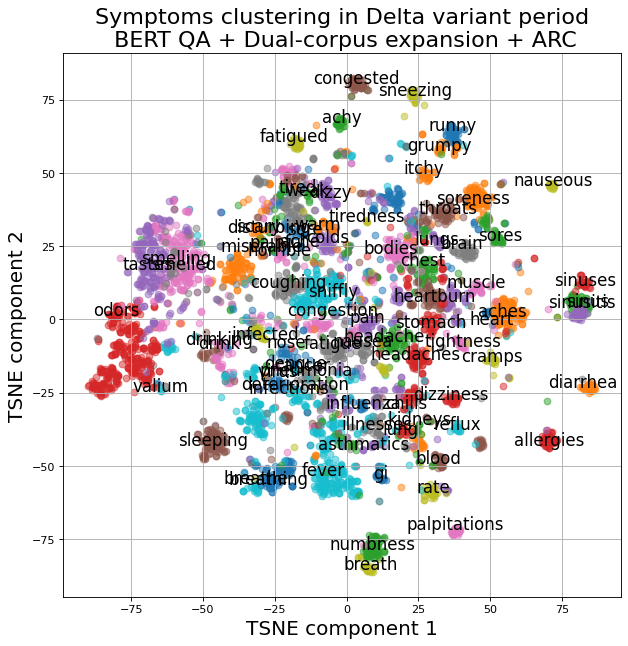

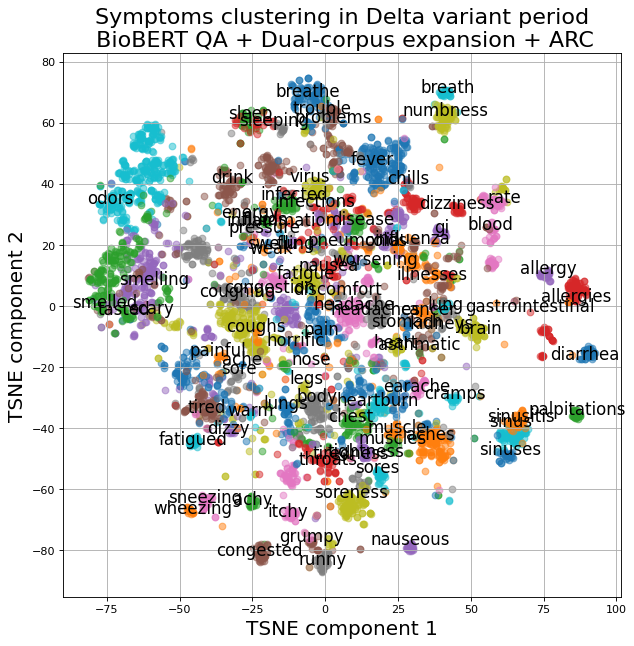

In [12]:
figure(figsize=(9, 9), dpi=80)
TSNE_Visualization(sym2vec_dic_BERTlarge, iter_dic_BERTlarge, plotname ='Symptoms clustering in Delta variant period\n BERT QA + Dual-corpus expansion + ARC', freq=20)
figure(figsize=(9, 9), dpi=80)
TSNE_Visualization(sym2vec_dic_BioBERTlarge, iter_dic_BioBERTlarge, plotname ='Symptoms clustering in Delta variant period\n BioBERT QA + Dual-corpus expansion + ARC', freq=20)


### Assign UMLS symptom directly

In [66]:
ULMS_mapping_sym_BERTlarge2020 = np.load('./output_files/ULMS_mapping_sym_BERTlarge.npy',allow_pickle='TRUE').item()['ULMS_mapping_sym_BERTlarge']
ULMS_mapping_sym_BioBERTlarge2020 = np.load('./output_files/ULMS_mapping_sym_BioBERTlarge.npy',allow_pickle='TRUE').item()['ULMS_mapping_sym_BioBERTlarge']


In [67]:
ULMS_mapping_sym_BERTlarge = {} 
for k,v in iter_dic_BERTlarge.items():
    for k2020, v2020 in ULMS_mapping_sym_BERTlarge2020.items():
        if k == k2020[1:]:
            ULMS_mapping_sym_BERTlarge[k2020] = v + [v2020[-1]]
            break
ULMS_mapping_sym_BioBERTlarge = {} 
for k,v in iter_dic_BioBERTlarge.items():
    for k2020, v2020 in ULMS_mapping_sym_BioBERTlarge2020.items():
        if k == k2020[1:]:
            ULMS_mapping_sym_BioBERTlarge[k2020] = v + [v2020[-1]]
            break

######################  Or use UMLS mapping (not good): ######################

### Read UMLS dictionary

In [57]:
# import re
# symptom_synonyms_dic = np.load('./symptom_synonyms.npy',allow_pickle='TRUE').item()
# symptom_synonyms_dic = dict((k.lower(), v) for k, v in symptom_synonyms_dic.items())  #make keys lowers
# symptom_synonyms_dic = dict((k, [vi.lower() for vi in v]) for k, v in symptom_synonyms_dic.items()) #make values lowers
# symptom_synonyms_dic = dict((k, [k]+v) for k, v in symptom_synonyms_dic.items())      #key also in values
# symptom_synonyms_dic_words = dict((k, set(re.findall(r"[\w']+", ' '.join(v)))) for k, v in symptom_synonyms_dic.items()) #make values' word


### Make UMLS dictionary smaller

In [58]:
# print("original UMLS dictionary has", len(symptom_synonyms_dic), "items")

# symptom_synonyms_basic_dic = {}
# for k, vs in symptom_synonyms_dic.items():
#     symptom_synonyms_basic_dic_keywords_set = set(re.findall(r"[\w']+", ' '.join(vs)))
#     if (sym_key_query_BERTlarge.union(sym_key_query_BioBERTlarge)-{'no','not'}).intersection(symptom_synonyms_basic_dic_keywords_set) != set():
# #     if (set(input_words_together)-{'no','not'}).intersection(symptom_synonyms_basic_dic_keywords_set) != set():
#         symptom_synonyms_basic_dic[k] = vs
#     else:
#         continue
# print("smaller UMLS dictionary has", len(symptom_synonyms_basic_dic), "items")



original UMLS dictionary has 359084 items
smaller UMLS dictionary has 158219 items


### UMLS map

In [59]:
# %run './py_func/UMLS_mapping_method.py'

In [ ]:
# #<prevent running>
# ULMS_mapping_sym_BERTlarge = UMLS_mapping_method(iter_dic_BERTlarge,UMLS_basic_dic=symptom_synonyms_basic_dic)
# ULMS_mapping_sym_BioBERTlarge = UMLS_mapping_method(iter_dic_BioBERTlarge, UMLS_basic_dic = symptom_synonyms_basic_dic)

In [2]:
# # np.save('./output_files/2021JulAugSep/ULMS_mapping_sym_BERTlarge.npy', {'ULMS_mapping_sym_BERTlarge':ULMS_mapping_sym_BERTlarge}) 
# # np.save('./output_files/2021JulAugSep/ULMS_mapping_sym_BioBERTlarge.npy', {'ULMS_mapping_sym_BioBERTlarge':ULMS_mapping_sym_BioBERTlarge}) 
# ULMS_mapping_sym_BERTlarge = np.load('./output_files/2021JulAugSep/ULMS_mapping_sym_BERTlarge.npy',allow_pickle='TRUE').item()['ULMS_mapping_sym_BERTlarge']
# ULMS_mapping_sym_BioBERTlarge = np.load('./output_files/2021JulAugSep/ULMS_mapping_sym_BioBERTlarge.npy',allow_pickle='TRUE').item()['ULMS_mapping_sym_BioBERTlarge']

######################  Over  ######################

### Map original symptoms to standard names

In [68]:
standard_sym_per_body_BioBERTlarge =  []
for i in range(len(gathered_sym_per_body_BioBERTlarge)):
    standard_sym_per_body_BioBERTlarge.append([])
    for j in gathered_sym_per_body_BioBERTlarge[i]:
        for k,v in ULMS_mapping_sym_BioBERTlarge.items():
            if j in v:
                standard_sym_per_body_BioBERTlarge[i].append(v[-1][0])

standard_sym_per_body_BERTlarge =  []
for i in range(len(gathered_sym_per_body_BERTlarge)):
    standard_sym_per_body_BERTlarge.append([])
    for j in gathered_sym_per_body_BERTlarge[i]:
        for k,v in ULMS_mapping_sym_BERTlarge.items():
            if j in v:
                standard_sym_per_body_BERTlarge[i].append(v[-1][0])

### Get time-based symptoms

In [70]:
timebased_syms_Delta_BERTlarge = pd.DataFrame() #record for later using to create positive dataframe
timebased_syms_Delta_BERTlarge['author'] = ori_Int_Ans_content_id_BERTlarge
timebased_syms_Delta_BERTlarge['time'] = ori_Int_Ans_time_id_BERTlarge
timebased_syms_Delta_BERTlarge['symptoms'] = standard_sym_per_body_BERTlarge
# timebased_syms_Delta_BERTlarge.to_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BERTlarge.csv',index=False, encoding='utf_8_sig')
timebased_syms_Delta_BioBERTlarge = pd.DataFrame() #record for later using to create positive dataframe
timebased_syms_Delta_BioBERTlarge['author'] = ori_Int_Ans_content_id_BioBERTlarge
timebased_syms_Delta_BioBERTlarge['time'] = ori_Int_Ans_time_id_BioBERTlarge
timebased_syms_Delta_BioBERTlarge['symptoms'] = standard_sym_per_body_BioBERTlarge
# timebased_syms_Delta_BioBERTlarge.to_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BioBERTlarge.csv',index=False, encoding='utf_8_sig')


In [71]:
## load 
timebased_syms_Delta_BERTlarge = pd.read_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BERTlarge.csv')
timebased_syms_Delta_BioBERTlarge = pd.read_csv('./output_files/2021JulAugSep/timebased_syms_Delta_BioBERTlarge.csv')

### Count (by post)

In [72]:
print('--------------- BERT --------------- ')
count_list = [item for sublist in standard_sym_per_body_BERTlarge for item in list(set(sublist))]
count_list = [i for i in count_list if i !=' ']  #remove ' ' 
from collections import Counter
Counter(count_list).most_common()
symptom_freq_dataframe = pd.DataFrame.from_dict(Counter(count_list), orient='index').reset_index()
symptom_freq_dataframe = symptom_freq_dataframe.rename(columns={0: "count_freq"})
print(symptom_freq_dataframe.sort_values(by='count_freq', ascending=False).head(20))
# symptom_freq_dataframe.to_csv('./output_files/2021JulAugSep/Freq_by_post_BERT.csv', index=False)

print('--------------- BioBERT --------------- ')
count_list = [item for sublist in standard_sym_per_body_BioBERTlarge for item in list(set(sublist))]
count_list = [i for i in count_list if i!=' ']  #remove ' ' 
from collections import Counter
Counter(count_list).most_common()
symptom_freq_dataframe = pd.DataFrame.from_dict(Counter(count_list), orient='index').reset_index()
symptom_freq_dataframe = symptom_freq_dataframe.rename(columns={0: "count_freq"})
print(symptom_freq_dataframe.sort_values(by='count_freq', ascending=False).head(20))
# symptom_freq_dataframe.to_csv('./output_files/2021JulAugSep/Freq_by_post_BioBERT.csv', index=False)


--------------- BERT --------------- 
                     index  count_freq
0                 coughing        1548
7   loss of sense of smell        1428
2                    fever        1291
6                 headache        1145
5      sore throat symptom        1081
1           lack of energy         817
41                    pain         661
24                   aches         645
42                   smell         559
44              congestion         489
18                   taste         457
22             common cold         419
33                   chill         401
23  sore sensation quality         381
12                  nausea         377
16                    nose         368
8                    runny         368
46                   tired         365
51        chest discomfort         353
25                   sleep         352
--------------- BioBERT --------------- 
                     index  count_freq
0                 coughing        1787
6                    fev

### Count (by user)

In [73]:
print('Total number of positive users:', len(set(positive_data2021JulAugSep['author'])))

user_id_BERTlarge = np.load('./output_files/2021JulAugSep/Int_Ans_BERTlarge_and_ID.npy',allow_pickle='TRUE').item()['ori_Int_Ans_content_id_BERTlarge']
count_dic_BERTlarge = {} 
for i in range(len(user_id_BERTlarge)):
    if user_id_BERTlarge[i] not in count_dic_BERTlarge: 
        count_dic_BERTlarge[user_id_BERTlarge[i]] = set()
        count_dic_BERTlarge[user_id_BERTlarge[i]] = count_dic_BERTlarge[user_id_BERTlarge[i]].union(set(standard_sym_per_body_BERTlarge[i]))
    else:
        count_dic_BERTlarge[user_id_BERTlarge[i]] = count_dic_BERTlarge[user_id_BERTlarge[i]].union(set(standard_sym_per_body_BERTlarge[i]))
count_dic_BERTlarge = {k:v for k,v in count_dic_BERTlarge.items() if v!=set()}
print('NLP BERT: there are %d'%(len(count_dic_BERTlarge)), 'authors have been extracted COVID symptoms' ) 
print('On average, each author reported %f unique symptoms' %np.mean([len(v) for k,v in count_dic_BERTlarge.items()]))



user_id_BioBERTlarge = np.load('./output_files/2021JulAugSep/Int_Ans_BioBERTlarge_and_ID.npy',allow_pickle='TRUE').item()['ori_Int_Ans_content_id_BioBERTlarge']
count_dic_BioBERTlarge = {}
for i in range(len(user_id_BioBERTlarge)):
    if user_id_BioBERTlarge[i] not in count_dic_BioBERTlarge: 
        count_dic_BioBERTlarge[user_id_BioBERTlarge[i]] = set()
        count_dic_BioBERTlarge[user_id_BioBERTlarge[i]] = count_dic_BioBERTlarge[user_id_BioBERTlarge[i]].union(set(standard_sym_per_body_BioBERTlarge[i]))
    else:
        count_dic_BioBERTlarge[user_id_BioBERTlarge[i]] = count_dic_BioBERTlarge[user_id_BioBERTlarge[i]].union(set(standard_sym_per_body_BioBERTlarge[i]))
count_dic_BioBERTlarge = {k:v for k,v in count_dic_BioBERTlarge.items() if v!=set()}
print('NLP BioBERT: there are %d'%(len(count_dic_BioBERTlarge)), 'authors have been extracted COVID symptoms' ) 
print('On average, each author reported %f unique symptoms' %np.mean([len(v) for k,v in count_dic_BioBERTlarge.items()]))


Total number of positive users: 8794
NLP BERT: there are 4589 authors have been extracted COVID symptoms
On average, each author reported 4.113750 unique symptoms
NLP BioBERT: there are 5110 authors have been extracted COVID symptoms
On average, each author reported 4.326223 unique symptoms


In [74]:
print('--------------- BERT --------------- ')
count_list = [item for ks,vs in count_dic_BERTlarge.items() for item in list(vs)]
count_list = [i for i in count_list if i !=' ']  #remove ' ' 

from collections import Counter
Counter(count_list).most_common()
symptom_freq_dataframe = pd.DataFrame.from_dict(Counter(count_list), orient='index').reset_index()
symptom_freq_dataframe = symptom_freq_dataframe.rename(columns={0: "count_freq"})
symptom_freq_dataframe['freq'] = round(symptom_freq_dataframe['count_freq']/len(count_dic_BERTlarge),3)
print(symptom_freq_dataframe.sort_values(by='count_freq', ascending=False).head(20))
# symptom_freq_dataframe.to_csv('./output_files/2021JulAugSep/Freq_by_user_BERT.csv', index=False)


print('--------------- BioBERT --------------- ')
count_list = [item for ks,vs in count_dic_BioBERTlarge.items() for item in list(vs)]
count_list = [i for i in count_list if i !=' ']  #remove ' ' 
from collections import Counter
Counter(count_list).most_common()
symptom_freq_dataframe = pd.DataFrame.from_dict(Counter(count_list), orient='index').reset_index()
symptom_freq_dataframe = symptom_freq_dataframe.rename(columns={0: "count_freq"})
symptom_freq_dataframe['freq'] = round(symptom_freq_dataframe['count_freq']/len(count_dic_BioBERTlarge),3)
print(symptom_freq_dataframe.sort_values(by='count_freq', ascending=False).head(20))
# symptom_freq_dataframe.to_csv('./output_files/2021JulAugSep/Freq_by_user_BioBERT.csv', index=False)


--------------- BERT --------------- 
                        index  count_freq   freq
0                    coughing        1092  0.238
7      loss of sense of smell         994  0.217
2                       fever         979  0.213
6                    headache         863  0.188
5         sore throat symptom         827  0.180
1              lack of energy         633  0.138
24                      aches         520  0.113
40                       pain         502  0.109
43                      smell         440  0.096
44                 congestion         381  0.083
22                common cold         367  0.080
17                      taste         365  0.080
49                      tired         325  0.071
33                      chill         319  0.070
9                       runny         318  0.069
23     sore sensation quality         314  0.068
16                       nose         308  0.067
29  disorder due to infection         299  0.065
25                      sleep  